In [259]:
%matplotlib inline
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import os
import matplotlib
import matplotlib.pyplot as plt
import statistics
from math import sqrt
from scipy.stats import bootstrap

In [260]:
plt.rcParams['font.size'] = 16
plt.rcParams['legend.fontsize'] = 14

# Load data

In [261]:
df = pd.read_csv('../data/final/final.csv')
df.shape

(4464, 71)

In [262]:
df['any_issue'] = df['invalid_sex'] | df['invalid_age'] | df['failed_control']

In [263]:
df.head()

,ID,Время создания,Время изменения,Ваш пол,Сколько вам лет?,"Укажите тип населённого пункта, в котором вы проживаете.",Источник ответов,Кого бы вы НЕ хотели видеть своим соседом? / Наркозависимого,Кого бы вы НЕ хотели видеть своим соседом? / Человека другой расы,Кого бы вы НЕ хотели видеть своим соседом? / Гомосексуала,...,Q188: Justifiable: Euthanasia,Q193: Justifiable: Having casual sex,source,Q260: Sex,Q262: Age,source_age,source_sex,self_reported_age,self_reported_sex,any_issue
0,1.090644e+09,2022-02-09 21:37:05,2022-02-09 21:37:05,Женский,более 50,средний город (50-100 тыс. жителей),female_50,NaN,NaN,NaN,...,1.0,3.0,ours,NaN,NaN,50+,female,50+,female,False
1,1.090638e+09,2022-02-09 21:30:53,2022-02-09 21:30:53,Женский,более 50,средний город (50-100 тыс. жителей),female_50,Наркозависимого,NaN,NaN,...,5.0,5.0,ours,NaN,NaN,50+,female,50+,female,True
2,1.090637e+09,2022-02-09 21:29:54,2022-02-09 21:29:54,Женский,более 50,крупный город (свыше 500 тыс. жителей),female_50,Наркозависимого,NaN,NaN,...,1.0,3.0,ours,NaN,NaN,50+,female,50+,female,False
3,1.090636e+09,2022-02-09 21:29:15,2022-02-09 21:29:15,Женский,более 50,посёлок городского типа,female_50,Наркозависимого,NaN,NaN,...,1.0,1.0,ours,NaN,NaN,50+,female,50+,female,True
4,1.090634e+09,2022-02-09 21:27:28,2022-02-09 21:27:28,Женский,более 50,средний город (50-100 тыс. жителей),female_50,Наркозависимого,NaN,Гомосексуала,...,3.0,2.0,ours,NaN,NaN,50+,female,50+,female,True


# Table: Samples comparison

In [264]:
df['ID'] = list(range(len(df)))
df.head()

,ID,Время создания,Время изменения,Ваш пол,Сколько вам лет?,"Укажите тип населённого пункта, в котором вы проживаете.",Источник ответов,Кого бы вы НЕ хотели видеть своим соседом? / Наркозависимого,Кого бы вы НЕ хотели видеть своим соседом? / Человека другой расы,Кого бы вы НЕ хотели видеть своим соседом? / Гомосексуала,...,Q188: Justifiable: Euthanasia,Q193: Justifiable: Having casual sex,source,Q260: Sex,Q262: Age,source_age,source_sex,self_reported_age,self_reported_sex,any_issue
0,0,2022-02-09 21:37:05,2022-02-09 21:37:05,Женский,более 50,средний город (50-100 тыс. жителей),female_50,NaN,NaN,NaN,...,1.0,3.0,ours,NaN,NaN,50+,female,50+,female,False
1,1,2022-02-09 21:30:53,2022-02-09 21:30:53,Женский,более 50,средний город (50-100 тыс. жителей),female_50,Наркозависимого,NaN,NaN,...,5.0,5.0,ours,NaN,NaN,50+,female,50+,female,True
2,2,2022-02-09 21:29:54,2022-02-09 21:29:54,Женский,более 50,крупный город (свыше 500 тыс. жителей),female_50,Наркозависимого,NaN,NaN,...,1.0,3.0,ours,NaN,NaN,50+,female,50+,female,False
3,3,2022-02-09 21:29:15,2022-02-09 21:29:15,Женский,более 50,посёлок городского типа,female_50,Наркозависимого,NaN,NaN,...,1.0,1.0,ours,NaN,NaN,50+,female,50+,female,True
4,4,2022-02-09 21:27:28,2022-02-09 21:27:28,Женский,более 50,средний город (50-100 тыс. жителей),female_50,Наркозависимого,NaN,Гомосексуала,...,3.0,2.0,ours,NaN,NaN,50+,female,50+,female,True


In [265]:
def make_pivot_df(df, col):
    df_copy = df.copy()
    df_copy['ID'] = list(range(len(df_copy)))
    df_copy = df_copy.set_index(['ID', 'source'])
    df_copy['person_ID'] = list(range(len(df_copy)))

    df_pivot = pd.pivot_table(df_copy, 
                              index='source',
                              values='person_ID',
                              columns=col,
                              aggfunc=pd.Series.nunique)
    return df_pivot

In [266]:
demographic_columns = [
   'source_age', 'source_sex',
]

df_demographic = pd.pivot_table(
    df, 
    index='source',
    values='ID',
    columns=demographic_columns,
    aggfunc=pd.Series.nunique,
)
df_demographic

source_age              29       30-49         50+     
source_sex          female male female male female male
source                                                 
ours                   352  294    471  471    634  432
world_values_survey    194  191    390  308    480  247

In [267]:
df_demographic_post_qc = pd.pivot_table(
    df[(df.source == 'world_values_survey') | (df.failed_control == False)], 
    index='source',
    values='ID',
    columns=demographic_columns,
    aggfunc=pd.Series.nunique,
)
df_demographic_post_qc

source_age              29       30-49         50+     
source_sex          female male female male female male
source                                                 
ours                   238  213    352  368    439  347
world_values_survey    194  191    390  308    480  247

In [268]:
# df_demographic_post_qc = pd.pivot_table(
#     df[(df.any_issue == False)], 
#     index='source',
#     values='ID',
#     columns=demographic_columns,
#     aggfunc=pd.Series.nunique,
# )
# df_demographic_post_qc

In [269]:
print(df_demographic.to_latex())

\begin{tabular}{lrrrrrr}
\toprule
source\_age & \multicolumn{2}{l}{29} & \multicolumn{2}{l}{30-49} & \multicolumn{2}{l}{50+} \\
source\_sex & female & male & female & male & female & male \\
source              &        &      &        &      &        &      \\
\midrule
ours                &    352 &  294 &    471 &  471 &    634 &  432 \\
world\_values\_survey &    194 &  191 &    390 &  308 &    480 &  247 \\
\bottomrule
\end{tabular}



/var/folders/bt/g8bj53xj0tvbvs3wn8hkx2c5g9x1f4/T/ipykernel_3636/3893231513.py:1: FutureWarning: In future versions `DataFrame.to_latex` is expected to utilise the base implementation of `Styler.to_latex` for formatting and rendering. The arguments signature may therefore change. It is recommended instead to use `DataFrame.style.to_latex` which also contains additional functionality.
  print(df_demographic.to_latex())


In [270]:
df_demographic.reset_index()[df_demographic.reset_index().source == 'ours'].T.values[1:].sum()

2654

In [271]:
df_demographic.reset_index()[df_demographic.reset_index().source != 'ours'].T.values[1:].sum()

1810

In [272]:
print(df_demographic_post_qc.to_latex())

\begin{tabular}{lrrrrrr}
\toprule
source\_age & \multicolumn{2}{l}{29} & \multicolumn{2}{l}{30-49} & \multicolumn{2}{l}{50+} \\
source\_sex & female & male & female & male & female & male \\
source              &        &      &        &      &        &      \\
\midrule
ours                &    238 &  213 &    352 &  368 &    439 &  347 \\
world\_values\_survey &    194 &  191 &    390 &  308 &    480 &  247 \\
\bottomrule
\end{tabular}



/var/folders/bt/g8bj53xj0tvbvs3wn8hkx2c5g9x1f4/T/ipykernel_3636/2322870061.py:1: FutureWarning: In future versions `DataFrame.to_latex` is expected to utilise the base implementation of `Styler.to_latex` for formatting and rendering. The arguments signature may therefore change. It is recommended instead to use `DataFrame.style.to_latex` which also contains additional functionality.
  print(df_demographic_post_qc.to_latex())


In [273]:
df_demographic_post_qc.reset_index()[df_demographic_post_qc.reset_index().source == 'ours'].T.values[1:].sum()

1957

# Self-reported demographics vs toloka-provided demographics

In [274]:
df_demographic_post_qc

source_age              29       30-49         50+     
source_sex          female male female male female male
source                                                 
ours                   238  213    352  368    439  347
world_values_survey    194  191    390  308    480  247

In [275]:
# Self-reported age/sex
df_self_reported = pd.pivot_table(
    df[(df.source == 'world_values_survey') | (df.failed_control == False)],
    index='source',
    values='ID',
    columns=['self_reported_age', 'self_reported_sex'],
    aggfunc=pd.Series.nunique,
)
df_self_reported

self_reported_age       29       30-49         50+     
self_reported_sex   female male female male female male
source                                                 
ours                   205  182    389  422    417  342
world_values_survey    194  191    390  308    480  247

In [276]:
df_self_reported.reset_index()[df_self_reported.reset_index().source == 'ours'].T.values[1:].sum()

1957

In [277]:
print(df_self_reported.to_latex())

\begin{tabular}{lrrrrrr}
\toprule
self\_reported\_age & \multicolumn{2}{l}{29} & \multicolumn{2}{l}{30-49} & \multicolumn{2}{l}{50+} \\
self\_reported\_sex & female & male & female & male & female & male \\
source              &        &      &        &      &        &      \\
\midrule
ours                &    205 &  182 &    389 &  422 &    417 &  342 \\
world\_values\_survey &    194 &  191 &    390 &  308 &    480 &  247 \\
\bottomrule
\end{tabular}



/var/folders/bt/g8bj53xj0tvbvs3wn8hkx2c5g9x1f4/T/ipykernel_3636/3598230467.py:1: FutureWarning: In future versions `DataFrame.to_latex` is expected to utilise the base implementation of `Styler.to_latex` for formatting and rendering. The arguments signature may therefore change. It is recommended instead to use `DataFrame.style.to_latex` which also contains additional functionality.
  print(df_self_reported.to_latex())


# Figure: all differences atlas

In [278]:
df_clean = df[(pd.isnull(df.failed_control))|(df.failed_control == False)]
#df_clean = df_clean[(df_clean != -2).all(axis=1)]
#df_clean = df_clean[(df_clean != -2).all(axis=1)]
print(df.shape, df_clean.shape)
df_clean.head()

(4464, 72) (3767, 72)


,ID,Время создания,Время изменения,Ваш пол,Сколько вам лет?,"Укажите тип населённого пункта, в котором вы проживаете.",Источник ответов,Кого бы вы НЕ хотели видеть своим соседом? / Наркозависимого,Кого бы вы НЕ хотели видеть своим соседом? / Человека другой расы,Кого бы вы НЕ хотели видеть своим соседом? / Гомосексуала,...,Q188: Justifiable: Euthanasia,Q193: Justifiable: Having casual sex,source,Q260: Sex,Q262: Age,source_age,source_sex,self_reported_age,self_reported_sex,any_issue
0,0,2022-02-09 21:37:05,2022-02-09 21:37:05,Женский,более 50,средний город (50-100 тыс. жителей),female_50,NaN,NaN,NaN,...,1.0,3.0,ours,NaN,NaN,50+,female,50+,female,False
2,2,2022-02-09 21:29:54,2022-02-09 21:29:54,Женский,более 50,крупный город (свыше 500 тыс. жителей),female_50,Наркозависимого,NaN,NaN,...,1.0,3.0,ours,NaN,NaN,50+,female,50+,female,False
7,7,2022-02-09 21:25:52,2022-02-09 21:25:52,Женский,более 50,крупный город (свыше 500 тыс. жителей),female_50,Наркозависимого,NaN,NaN,...,8.0,8.0,ours,NaN,NaN,50+,female,50+,female,False
9,9,2022-02-09 21:25:00,2022-02-09 21:25:00,Женский,более 50,крупный город (свыше 500 тыс. жителей),female_50,Наркозависимого,NaN,NaN,...,6.0,6.0,ours,NaN,NaN,50+,female,50+,female,False
10,10,2022-02-09 21:24:18,2022-02-09 21:24:18,Женский,более 50,малый город (до 50 тыс. жителей),female_50,NaN,NaN,NaN,...,5.0,2.0,ours,NaN,NaN,50+,female,50+,female,False


## Util functions

In [279]:
def plot_confidence_interval(x, values,  label=None, color='#2187bb', horizontal_line_width=0.25, ax = None):
    mean = np.mean(values)
    confidence_interval = bootstrap((values,), np.mean, confidence_level=0.95).confidence_interval
    
    top = confidence_interval.low
    bottom = confidence_interval.high
    left = x - horizontal_line_width / 2
    right = x + horizontal_line_width / 2
    
    ax = ax or plt.gca()
    
    ax.plot([x, x], [top, bottom], color=color, label=label)
    ax.plot([left, right], [top, top], color=color)
    ax.plot([left, right], [bottom, bottom], color=color)
    ax.plot(x, mean, 'o', color='#f44336')

    return mean, confidence_interval


def assign_color(source):
    if source == 'ours':
        return 'green'
    else:
        return 'orange'

# plt.xticks([1, 2, 3, 4], ['FF', 'BF', 'FFD', 'BFD'])
# plt.title('Confidence Interval')
# plot_confidence_interval(1, [10, 11, 42, 45, 44])
# plot_confidence_interval(2, [10, 21, 42, 45, 44])
# plot_confidence_interval(3, [20, 2, 4, 45, 44])
# plot_confidence_interval(4, [30, 31, 42, 45, 44])
# plt.show()

## Draw figure

In [280]:
question_cols = [
    'Q18: Neighbors: Drug addicts',
       'Q19: Neighbors: People of a different race',
       'Q21: Neighbors: Immigrants/foreign workers',
       'Q22: Neighbors: Homosexuals',
       'Q23: Neighbors: People of a different religion',
       'Q29: Men make better political leaders than women do',
       'Q36: Homosexual couples are as good parents as other couples',
       'Q69: Confidence: The Police',
       'Q71: Confidence: The Government', 
       'Q80: Confidence: The Women´s Movement',
       'Q130: Immigration policy preference',
       'Q182: Justifiable: Homosexuality', 
       'Q183: Justifiable: Prostitution',
       'Q184: Justifiable: Abortion',
       'Q187: Justifiable: Suicide',
       'Q186: Justifiable: Sex before marriage', 
       'Q188: Justifiable: Euthanasia', 
       'Q189: Justifiable: For a man to beat his wife',
       'Q190: Justifiable: Parents beating children',
       'Q193: Justifiable: Having casual sex',
       'Q212: Political action: Joining unofficial strikes',
       'Q227: How often in country´s elections: Voters are bribed',
    
]

In [281]:
# fig = plt.figure(figsize=(20, 30))
# fig.tight_layout()
# suptitle = fig.suptitle(' ')

# ncols = 3
# subfigs = fig.subfigures(nrows=round(len(question_cols)/ncols), ncols=ncols)
# for row, row_subfigs in enumerate(subfigs):
#     for col, subfig in enumerate(row_subfigs):
#         if row*len(row_subfigs)+col >= len(question_cols):
#             break
#         col = question_cols[row*len(row_subfigs)+col]
#         subfig.suptitle(f'{col}')
        
        
#         w_margin = 0.05
#         subfig.subplots_adjust(top=0.85, wspace=0.05, left=w_margin, right=1-w_margin)
        
#         if row == 0:
#             subfig.subplots_adjust(top=None)
            
#         axs = subfig.subplots(nrows=1, ncols=2, sharey=True)
#         #counter = 0
#         for i, sex in enumerate(['male', 'female']):
#             #ax = axs[counter]
#             ax = axs[i]
#             #counter += 1
#             ticks = []
#             for j, age in enumerate(['29', '30-49', '50+']):
#                 for k, source in enumerate(['ours', 'world_values_survey']):
#                     vals = df_clean[(df_clean.source==source)&(df_clean.source_sex==sex)&(df_clean.source_age==age)][col].dropna()
#                     plot_confidence_interval(j+k*0.25, vals, color=assign_color(source), label=source, ax=ax)
#                 ticks.append((j + j+k*0.25)/2)
#             ax.set_xticks(ticks, ['29', '30-49', '50+'])
#             ax.set_title(sex)
#             ax.plot()

# handles, labels = ax.get_legend_handles_labels()
# handles, labels = handles[:2], labels[:2]
# lgd = fig.legend(handles, labels, loc='lower center',  bbox_to_anchor=(0.5,1.005))

# plt.savefig('atlas.pdf', format='pdf', bbox_inches='tight', bbox_extra_artists=(lgd,))
# plt.show()

# Findings: overall differences

In [282]:
from scipy.stats import chi2_contingency

def make_pivot_df(df, col, normalize=False):
    df_copy = df.copy()
    df_copy['ID'] = list(range(len(df_copy)))
    df_copy = df_copy.set_index(['ID', 'source'])
    df_copy['person_ID'] = list(range(len(df_copy)))

    df_pivot = pd.pivot_table(df_copy, 
                              index='source',
                              values='person_ID',
                              columns=col,
                              aggfunc=pd.Series.nunique,
                             )
    df_pivot = df_pivot.fillna(0)
    if normalize:
        df_pivot = df_pivot.apply(lambda x: x / float(x.sum()), axis=1)
    return df_pivot

def chi2test(df, col, print_stuff=True):
    pivot = make_pivot_df(df, col)
    stat, p, dof, ex = chi2_contingency(pivot, correction=False)
    if print_stuff:
        print('stat=%.3f, p=%.3f' % (stat, p))
        if p < 0.05:
            print('Probably different distributions')
        else:
            print('Probably the same distribution')
    return p

In [283]:
cols_and_pvals = []

for q in question_cols:
    p = chi2test(df_clean, q, print_stuff=True)
    cols_and_pvals.append({'question': q, 'age': None, 'sex': None, 'pval': p})
    for age in ['29', '30-49', '50+']:
        for sex in ['male', 'female']:
            p = chi2test(df_clean[(df_clean.source_age==age)&(df_clean.source_sex==sex)], q, print_stuff=False)
            cols_and_pvals.append({'question': q, 'age': age, 'sex': sex, 'pval': p})
        
def to_readable_pval(pval):
    if pval < 1e-10:
        return '< 1e-10'
    elif pval < 1e-5:
        return '< 1e-5'
    return f'{pval:.1e}'


diffs_df = pd.DataFrame(cols_and_pvals)
    
diffs_df['significant'] = diffs_df['pval'].apply(lambda p: 'Yes' if p < 0.05 else 'No')
diffs_df['pval'] = diffs_df['pval'].apply(to_readable_pval)
diffs_df.columns = ['Question', 'Age', 'Sex', '$\chi^2$ p-value', 'Significant']
diffs_df

stat=0.312, p=0.577
Probably the same distribution
stat=95.810, p=0.000
Probably different distributions
stat=86.992, p=0.000
Probably different distributions
stat=505.028, p=0.000
Probably different distributions
stat=23.113, p=0.000
Probably different distributions
stat=100.090, p=0.000
Probably different distributions
stat=100.766, p=0.000
Probably different distributions
stat=132.753, p=0.000
Probably different distributions
stat=102.184, p=0.000
Probably different distributions
stat=89.858, p=0.000
Probably different distributions
stat=197.084, p=0.000
Probably different distributions
stat=215.098, p=0.000
Probably different distributions
stat=334.960, p=0.000
Probably different distributions
stat=462.542, p=0.000
Probably different distributions
stat=258.015, p=0.000
Probably different distributions
stat=327.467, p=0.000
Probably different distributions
stat=330.398, p=0.000
Probably different distributions
stat=161.459, p=0.000
Probably different distributions
stat=263.233, p=0.

,Question,Age,Sex,$\chi^2$ p-value,Significant
0,Q18: Neighbors: Drug addicts,None,None,5.8e-01,No
1,Q18: Neighbors: Drug addicts,29,male,6.1e-01,No
2,Q18: Neighbors: Drug addicts,29,female,2.4e-01,No
3,Q18: Neighbors: Drug addicts,30-49,male,9.3e-02,No
4,Q18: Neighbors: Drug addicts,30-49,female,1.9e-01,No
...,...,...,...,...,...
149,Q227: How often in country´s elections: Voters are bribed,29,female,< 1e-10,Yes
150,Q227: How often in country´s elections: Voters are bribed,30-49,male,< 1e-5,Yes
151,Q227: How often in country´s elections: Voters are bribed,30-49,female,< 1e-10,Yes
152,Q227: How often in country´s elections: Voters are bribed,50+,male,1.8e-04,Yes


In [284]:
diffs_df_detailed = diffs_df[(~pd.isnull(diffs_df.Age)) & (~pd.isnull(diffs_df.Sex))]
diffs_df_detailed = diffs_df_detailed.set_index(['Question', 'Age', 'Sex'])
diffs_df_detailed

$\chi^2$ p-value  \
Question                                                  Age   Sex                       
Q18: Neighbors: Drug addicts                              29    male            6.1e-01   
                                                                female          2.4e-01   
                                                          30-49 male            9.3e-02   
                                                                female          1.9e-01   
                                                          50+   male            4.8e-01   
...                                                                                 ...   
Q227: How often in country´s elections: Voters are bribed 29    female          < 1e-10   
                                                          30-49 male             < 1e-5   
                                                                female          < 1e-10   
                                                          50+   male            1.8e-04   
                                                                female          < 1e-10   

                                                                       Significant  
Question                                                  Age   Sex                 
Q18: Neighbors: Drug addicts                              29    male            No  
                                                                female          No  
                                                          30-49 male            No  
                                                                female          No  
                                                          50+   male            No  
...                                                                            ...  
Q227: How often in country´s elections: Voters are bribed 29    female         Yes  
                                                          30-49 male           Yes  
                                                                female         Yes  
                                                          50+   male           Yes  
                                                                female         Yes  

[132 rows x 2 columns]

In [285]:
print(diffs_df_detailed.to_latex())

\begin{tabular}{lllll}
\toprule
                                                          &     &        & \$\textbackslash chi\textasciicircum 2\$ p-value & Significant \\
Question & Age & Sex &                  &             \\
\midrule
Q18: Neighbors: Drug addicts & 29 & male &          6.1e-01 &          No \\
                                                          &     & female &          2.4e-01 &          No \\
                                                          & 30-49 & male &          9.3e-02 &          No \\
                                                          &     & female &          1.9e-01 &          No \\
                                                          & 50+ & male &          4.8e-01 &          No \\
                                                          &     & female &          9.4e-01 &          No \\
Q19: Neighbors: People of a different race & 29 & male &          1.4e-01 &          No \\
                                                  

/var/folders/bt/g8bj53xj0tvbvs3wn8hkx2c5g9x1f4/T/ipykernel_3636/253972544.py:1: FutureWarning: In future versions `DataFrame.to_latex` is expected to utilise the base implementation of `Styler.to_latex` for formatting and rendering. The arguments signature may therefore change. It is recommended instead to use `DataFrame.style.to_latex` which also contains additional functionality.
  print(diffs_df_detailed.to_latex())


## Chi-squared comparison of questions

In [286]:
diffs_df[pd.isnull(diffs_df['Age'])].drop(columns=['Age', 'Sex']).drop_duplicates()

,Question,$\chi^2$ p-value,Significant
0,Q18: Neighbors: Drug addicts,5.8e-01,No
7,Q19: Neighbors: People of a different race,< 1e-10,Yes
14,Q21: Neighbors: Immigrants/foreign workers,< 1e-10,Yes
21,Q22: Neighbors: Homosexuals,< 1e-10,Yes
28,Q23: Neighbors: People of a different religion,< 1e-5,Yes
35,Q29: Men make better political leaders than women do,< 1e-10,Yes
42,Q36: Homosexual couples are as good parents as other couples,< 1e-10,Yes
49,Q69: Confidence: The Police,< 1e-10,Yes
56,Q71: Confidence: The Government,< 1e-10,Yes
63,Q80: Confidence: The Women´s Movement,< 1e-10,Yes


In [287]:
pd.set_option('max_colwidth',999)
print(diffs_df[pd.isnull(diffs_df['Age'])].drop(columns=['Age', 'Sex']).drop_duplicates().to_latex(index=False))

\begin{tabular}{lll}
\toprule
                                                    Question & \$\textbackslash chi\textasciicircum 2\$ p-value & Significant \\
\midrule
                                Q18: Neighbors: Drug addicts &          5.8e-01 &          No \\
                  Q19: Neighbors: People of a different race &          < 1e-10 &         Yes \\
                  Q21: Neighbors: Immigrants/foreign workers &          < 1e-10 &         Yes \\
                                 Q22: Neighbors: Homosexuals &          < 1e-10 &         Yes \\
              Q23: Neighbors: People of a different religion &           < 1e-5 &         Yes \\
        Q29: Men make better political leaders than women do &          < 1e-10 &         Yes \\
Q36: Homosexual couples are as good parents as other couples &          < 1e-10 &         Yes \\
                                 Q69: Confidence: The Police &          < 1e-10 &         Yes \\
                             Q71: Confidence: The Govern

/var/folders/bt/g8bj53xj0tvbvs3wn8hkx2c5g9x1f4/T/ipykernel_3636/1982499453.py:2: FutureWarning: In future versions `DataFrame.to_latex` is expected to utilise the base implementation of `Styler.to_latex` for formatting and rendering. The arguments signature may therefore change. It is recommended instead to use `DataFrame.style.to_latex` which also contains additional functionality.
  print(diffs_df[pd.isnull(diffs_df['Age'])].drop(columns=['Age', 'Sex']).drop_duplicates().to_latex(index=False))


## Chi-squared comparison of age/sex groups

In [288]:
# pd.set_option('display.max_rows', 150)
# diffs_df[~pd.isnull(diffs_df['Age'])].set_index(['Question', 'Age'])

# Specific findings

## Homosexual neighbors vs justifiable homosexuality vs homosexual couples

* In all 3 related questions, people on the internet are consistently less homophobic.
* You would expect older people to be more homophobic, it holds.
* You would expect women to be less homophobic, it holds.
* The biggest difference manifsts in the youngest age group. 

**Young people on the internet are significantly less homophobic, even though on the street survey their answers are not significantly different from other age groups** 

In [289]:
def bar_plot(ax, df, col, title, xticks_map, width=0.25):
    tdf = df[~df[col].isin([-1, -2])]
    vcounts = tdf[col].value_counts(normalize=True).sort_index()
    ticks = vcounts.index
    xtick_labels = [xticks_map.get(t, round(t)) for t in ticks]
    r = np.arange(len(ticks))
    for j, source in enumerate(['ours', 'world_values_survey']):
        source_df = tdf[tdf.source==source]
        source_df = source_df[~source_df[col].isin([-1, -2])]
        vcounts = source_df[col].value_counts(normalize=True)
        vals = [(vcounts[t] if t in vcounts.index else 0) for t in ticks]
        ax.bar(r + width*j, vals, width=width, label=source, color=assign_color(source))
        ax.set_xticks(r + width/2, labels=xtick_labels, rotation=45)
    ax.set_title(title)
    ax.set(xlabel=None)
    

# fig, axs = plt.subplots(1, 3, figsize=(20, 10), sharey='all')
# plt.tight_layout()
# axs[0].set_ylabel('Fraction of responses')
# bar_plot(axs[0], df_clean, 'Q22: Neighbors: Homosexuals', 
#          title='Q22: Neighbors: Homosexuals', 
#          xticks_map={1: 'Acceptable',
#                     2: 'Unacceptable'},
#         )

# bar_plot(axs[1], 
#          df=df_clean, 
#          col='Q182: Justifiable: Homosexuality', 
#          title='Q182: Justifiable: Homosexuality', 
#          xticks_map={-1: 'Not sure',
#                      1: '1\nDisagree',
#                     10: '10\nAgree'})

# bar_plot(axs[2], 
#          df=df_clean, 
#          col='Q36: Homosexual couples are as good parents as other couples', 
#          title='Q36: Homosexual couples are as good parents as other couples', 
#          xticks_map={-1: 'Not sure',
#                      5: '5\nDisagree',
#                     1: '1\nAgree'})



# handles, labels = axs[0].get_legend_handles_labels()
# fig.legend(handles, labels, loc='lower center')
# plt.savefig('homosexuality_three_questions.pdf', format='pdf', bbox_inches='tight')
# fig.show()



/var/folders/bt/g8bj53xj0tvbvs3wn8hkx2c5g9x1f4/T/ipykernel_3636/870722835.py:57: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


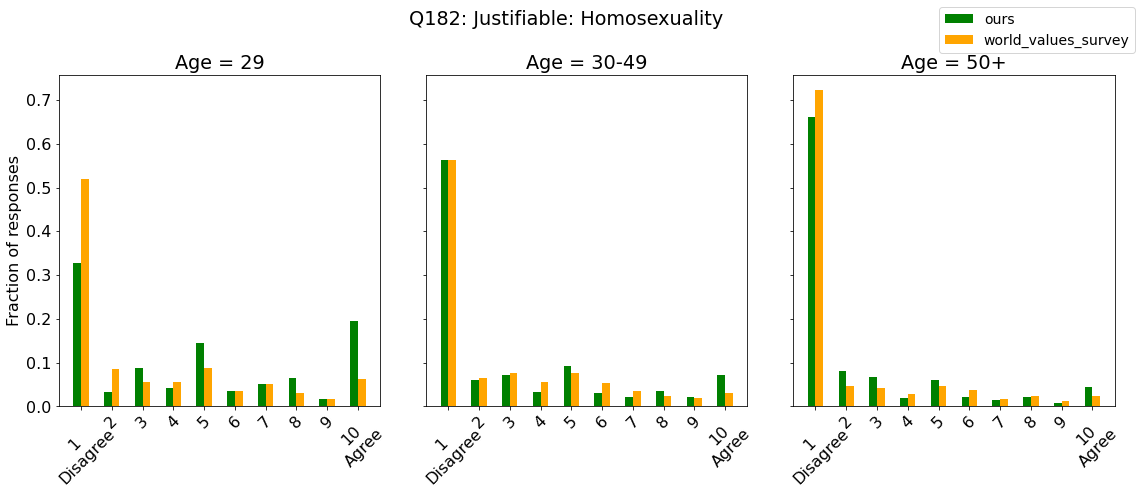

In [290]:
def plot_category_split(df, col, xticks_map, category='source_age', category_name='Age', xlabel=''):
    if category=='source_age':
        cat_values = ['29', '30-49', '50+']
    elif category =='source_sex':
        cat_values = ['male', 'female']
    else:
        cat_values = df[category].unique()
        
    
    fig, axs = plt.subplots(1, len(cat_values), figsize=(16, 7), sharey='all')
    for i, category_elem in enumerate(cat_values):
        category_df = df[df[category]==category_elem]
        bar_plot(axs[i], category_df,
        col, 
         title=f'{category_name} = {category_elem}', 
         xticks_map=xticks_map,
        )
        
#         width = 0.25
#         vcounts = category_df[col].value_counts(normalize=True).sort_index()
#         ticks = vcounts.index
#         xtick_labels = [xticks_map.get(t, t) for t in ticks]
#         r = np.arange(len(ticks))
#         for j, source in enumerate(['ours', 'world_values_survey']):
#             source_df = category_df[category_df.source==source]
#             vcounts = source_df[col].value_counts(normalize=True)
#             vals = [(vcounts[t] if t in vcounts.index else 0) for t in ticks]
#             axs[i].bar(r + width*j, vals, width=width, label=source, color=assign_color(source))
#             axs[i].set_xticks(r + width/2, labels=xtick_labels, rotation=45)
#         axs[i].set_title(f'{category_name} = {category_elem}')
#         axs[i].set(xlabel=xlabel)
        
    
    axs[0].set(ylabel="Fraction of responses")
    handles, labels = axs[0].get_legend_handles_labels()
    handles = handles[:2]
    labels = labels[:2]
    fig.legend(handles, labels)
    plt.suptitle(col)
    return fig

xticks_map = {
    -1: 'Not sure',
    1: '1\nDisagree',
    10: '10\nAgree',
}

fig = plot_category_split(df_clean, 
                          col='Q182: Justifiable: Homosexuality', 
                          category='source_age',
                          category_name='Age',
                          xticks_map=xticks_map,
                          xlabel='Agreement',
                         )
plt.tight_layout()
plt.savefig('homosexuality_age_split.pdf', format='pdf', bbox_inches='tight')
fig.show()

/var/folders/bt/g8bj53xj0tvbvs3wn8hkx2c5g9x1f4/T/ipykernel_3636/2838592111.py:19: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


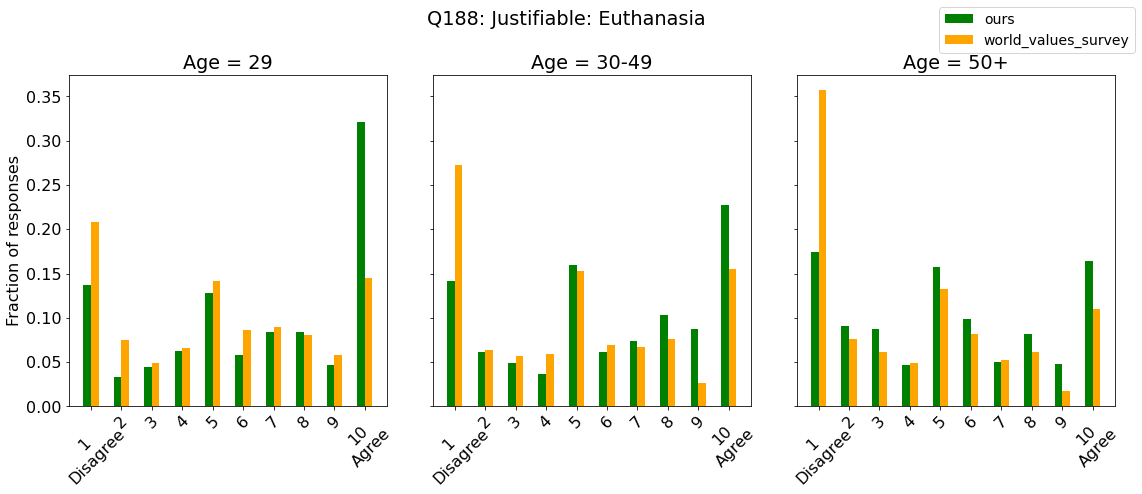

In [291]:
# plot_cats_by_category_normalized(df, 'Q188: Justifiable: Euthanasia', 'source_age')


xticks_map = {
    -1: 'Not sure',
    1: '1\nDisagree',
    10: '10\nAgree',
}

fig = plot_category_split(df_clean, 
                          col='Q188: Justifiable: Euthanasia', 
                          category='source_age',
                          category_name='Age',
                          xticks_map=xticks_map,
                          xlabel='Agreement',
                         )
plt.tight_layout()
plt.savefig('euthanasia_age_split.pdf', format='pdf', bbox_inches='tight')
fig.show()

# print('1 - disagree, 10 - agree')
# plot_cats_by_category_normalized(df,  'Q189: Justifiable: For a man to beat his wife', 'source_sex')


## Casual sex vs sex before marriage?

* In both questions we find that people on the internet are consistently more open-minded
* An most extreme difference is evident on the "having casual sex" question. In WVS survey a lot of respondents are on the "completely disagree" extreme. In our survey, the responses are more evenly distributed, with the majority not being against casual sex.
* The biggest difference is observed among females. 
* Old people in the survey internet appear to be more pro-sex before marriage than young people in wvs survey.

In [292]:
# # print('1 - disagree, 10 - agree')
# # plot_cats(df, 'Q186: Justifiable: Sex before marriage')

# # print('1 - disagree, 10 - agree')
# # plot_cats(df, 'Q193: Justifiable: Having casual sex')

# fig, axs = plt.subplots(1, 2, figsize=(20, 10), sharey='all')
# plt.tight_layout()
# axs[0].set_ylabel('Fraction of responses')

# bar_plot(axs[0], 
#          df=df_clean, 
#          col='Q186: Justifiable: Sex before marriage', 
#          title='Q186: Justifiable: Sex before marriage', 
#          xticks_map={-1: 'Not sure',
#                      1: '1\nDisagree',
#                     10: '10\nAgree'})

# bar_plot(axs[1], 
#          df=df_clean, 
#          col='Q193: Justifiable: Having casual sex', 
#          title='Q193: Justifiable: Having casual sex', 
#          xticks_map={-1: 'Not sure',
#                      1: '1\nDisagree',
#                     10: '10\nAgree'})


# handles, labels = axs[0].get_legend_handles_labels()
# fig.legend(handles, labels)
# plt.savefig('casual_sex_three_questions.pdf', format='pdf', bbox_inches='tight')
# fig.show()



In [293]:

# xticks_map = {
#     -1: 'Not sure',
#     1: '1\nDisagree',
#     10: '10\nAgree',
# }

# fig = plot_category_split(df_clean, 
#                           col='Q193: Justifiable: Having casual sex', 
#                           category='source_age',
#                           category_name='Age',
#                           xticks_map=xticks_map,
#                           xlabel='Agreement',
#                          )
# plt.tight_layout()
# plt.savefig('casual_sex_age_split.pdf', format='pdf', bbox_inches='tight')
# fig.show()

/var/folders/bt/g8bj53xj0tvbvs3wn8hkx2c5g9x1f4/T/ipykernel_3636/1609657033.py:16: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


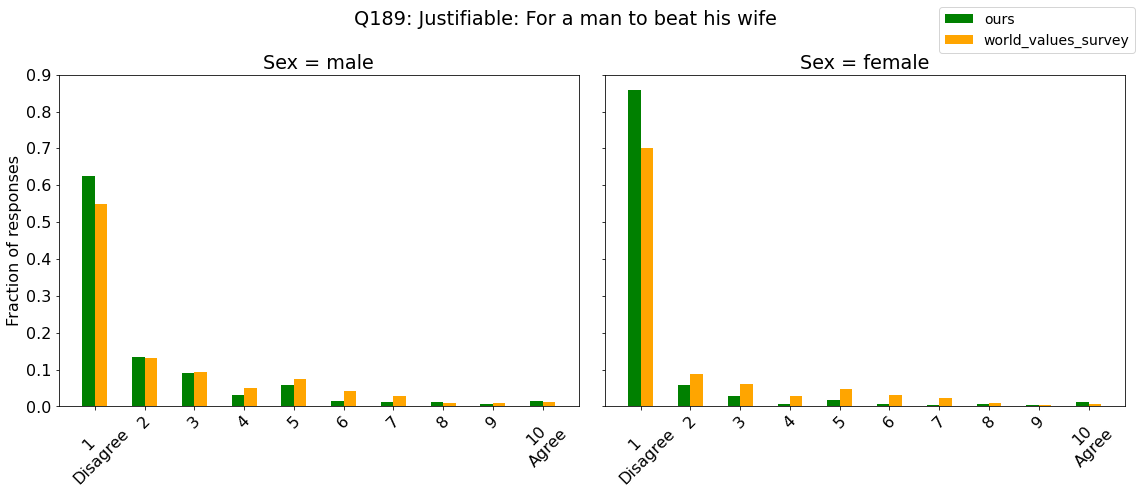

In [294]:

xticks_map = {
    -1: 'Not sure',
    1: '1\nDisagree',
    10: '10\nAgree',
}

fig = plot_category_split(df_clean, 
                          col='Q189: Justifiable: For a man to beat his wife', 
                          category='source_sex',
                          category_name='Sex',
                          xticks_map=xticks_map,
                          xlabel='Agreement',
                         )
plt.tight_layout()
plt.savefig('beat_wife_sex_split.pdf', format='pdf', bbox_inches='tight')
fig.show()

# print('1 - disagree, 10 - agree')
# plot_cats_by_category_normalized(df,  'Q189: Justifiable: For a man to beat his wife', 'source_sex')

In [295]:

# xticks_map = {
#     -1: 'Not sure',
#     1: '1\nDisagree',
#     10: '10\nAgree',
# }

# fig = plot_category_split(df_clean, 
#                           col='Q189: Justifiable: For a man to beat his wife', 
#                           category='source_age',
#                           category_name='Age',
#                           xticks_map=xticks_map,
#                           xlabel='Agreement',
#                          )
# plt.tight_layout()
# # plt.savefig('beat_wife_se_split.pdf', format='pdf', bbox_inches='tight')
# fig.show()

# # print('1 - disagree, 10 - agree')
# # plot_cats_by_category_normalized(df,  'Q189: Justifiable: For a man to beat his wife', 'source_sex')

# Atlas violins

In [296]:
question_cols

['Q18: Neighbors: Drug addicts',
 'Q19: Neighbors: People of a different race',
 'Q21: Neighbors: Immigrants/foreign workers',
 'Q22: Neighbors: Homosexuals',
 'Q23: Neighbors: People of a different religion',
 'Q29: Men make better political leaders than women do',
 'Q36: Homosexual couples are as good parents as other couples',
 'Q69: Confidence: The Police',
 'Q71: Confidence: The Government',
 'Q80: Confidence: The Women´s Movement',
 'Q130: Immigration policy preference',
 'Q182: Justifiable: Homosexuality',
 'Q183: Justifiable: Prostitution',
 'Q184: Justifiable: Abortion',
 'Q187: Justifiable: Suicide',
 'Q186: Justifiable: Sex before marriage',
 'Q188: Justifiable: Euthanasia',
 'Q189: Justifiable: For a man to beat his wife',
 'Q190: Justifiable: Parents beating children',
 'Q193: Justifiable: Having casual sex',
 'Q212: Political action: Joining unofficial strikes',
 'Q227: How often in country´s elections: Voters are bribed']

In [297]:
agree_disagree_questions = ['Q18: Neighbors: Drug addicts',
 'Q19: Neighbors: People of a different race',
 'Q21: Neighbors: Immigrants/foreign workers',
 'Q22: Neighbors: Homosexuals',
 'Q23: Neighbors: People of a different religion',
 ]

justifiable_questions = [
    'Q29: Men make better political leaders than women do',
 'Q36: Homosexual couples are as good parents as other couples',
 'Q182: Justifiable: Homosexuality',
 'Q183: Justifiable: Prostitution',
 'Q184: Justifiable: Abortion',
 'Q187: Justifiable: Suicide',
 'Q186: Justifiable: Sex before marriage',
 'Q188: Justifiable: Euthanasia',
 'Q189: Justifiable: For a man to beat his wife',
 'Q190: Justifiable: Parents beating children',
 'Q193: Justifiable: Having casual sex'
]

confidence_questions = ['Q69: Confidence: The Police',
 'Q71: Confidence: The Government',
 'Q80: Confidence: The Women´s Movement']

In [298]:
df_clean[agree_disagree_questions[0]].value_counts()

agree_disagree_map = {1: 'Acceptable', 2: 'Not\nacceptable'}
justifiable_map = {
    -1: 'Not sure',
    1: 'Disagree',
    10: 'Agree',
}

confidence_map = {
    1: 'Full trust',
    4: 'No trust',
    -1: 'Not sure',
}

def get_ticks_map(col):
    if col in agree_disagree_questions:
        return agree_disagree_map
    elif col in justifiable_questions:
        return justifiable_map
    elif col in confidence_questions:
        return confidence_map
    elif col == 'Q130: Immigration policy preference':
        return {
        1: 'Allow\nall', 
        2: 'Workers', 
        3: 'Some', 
        4: 'Allow\nnobody',
        -1: 'Not sure', 
    }
    elif col == 'Q212: Political action: Joining unofficial strikes':
        return {
        1: 'Joined',
        2: 'Could join',
        3: 'Would\nnever join',
        -1: 'Not sure',
            
        }
    elif col == 'Q227: How often in country´s elections: Voters are bribed':
        return {
        1: 'Very often',
        4: 'Very rare', 
        -1: 'Not sure', 
        }

    
    

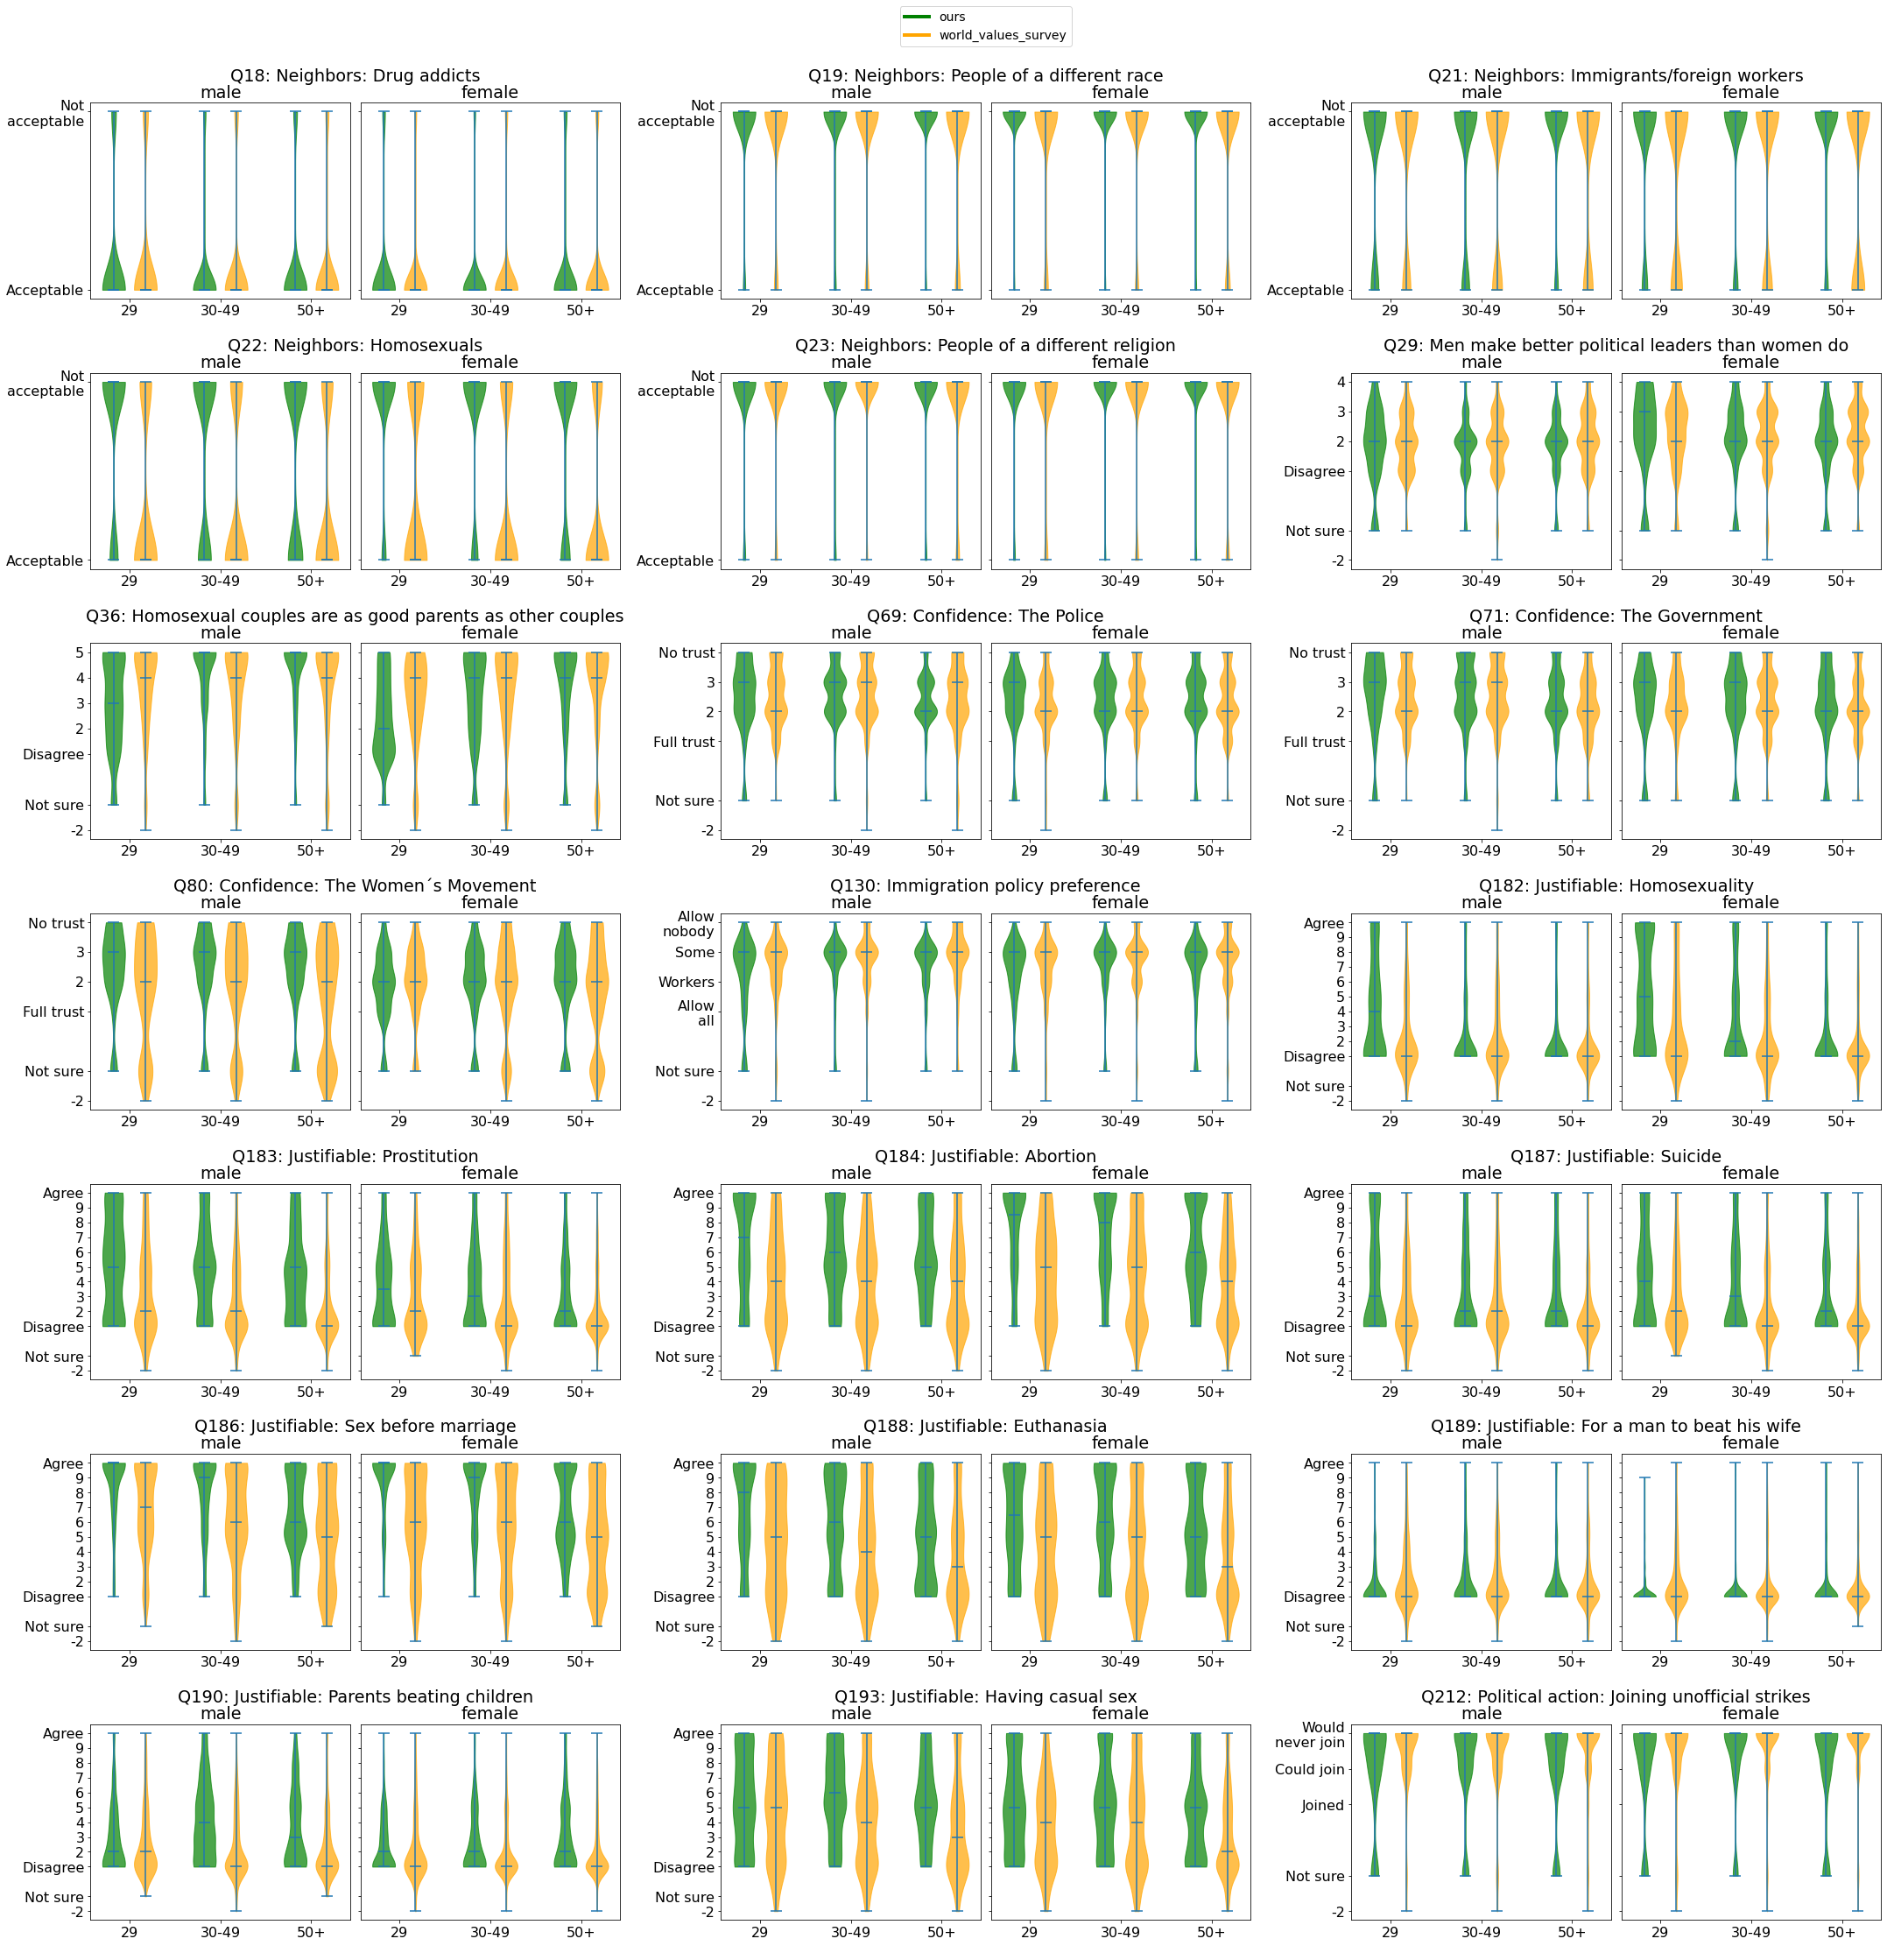

In [299]:
from matplotlib.lines import Line2D

fig = plt.figure(figsize=(30, 30))
fig.tight_layout()
suptitle = fig.suptitle(' ')

tick_maps = {
    # q : map
    
}


ncols = 3
subfigs = fig.subfigures(nrows=round(len(question_cols)/ncols), ncols=ncols, width_ratios=[0.1]*ncols)
for row, row_subfigs in enumerate(subfigs):
    for col, subfig in enumerate(row_subfigs):
        if row*len(row_subfigs)+col >= len(question_cols):
            break
        col = question_cols[row*len(row_subfigs)+col]
        subfig.suptitle(f'{col}')
        
        
        w_margin = 0.08
        subfig.subplots_adjust(top=0.85, wspace=0.04, left=w_margin, right=1-w_margin)
        
        if row == 0:
            subfig.subplots_adjust(top=None)
        axs = subfig.subplots(nrows=1, ncols=2, sharey=True, )
        #counter = 0
        for i, sex in enumerate(['male', 'female']):
            #ax = axs[counter]
            ax = axs[i]
            #counter += 1
            positions = []
            plot_data = df_clean[(df_clean.source_sex==sex)][['source_age', 'source', col]]
            plot_arrays = []
            gap = 0
            margin = 0.7
            for j, age in enumerate(['29', '30-49', '50+']):
                for k, source in enumerate(['ours', 'world_values_survey']):
                    vals_to_plot = plot_data[(plot_data.source_age == age)&(plot_data.source==source)][col].dropna()
                    #vals_to_plot = vals_to_plot[~vals_to_plot.isin([-1, -2])]
                    plot_arrays.append(vals_to_plot)
                    positions.append(gap+j+k*margin)
                gap += 1
            violin_parts = ax.violinplot(plot_arrays, positions=positions, showmedians=True)

            # Make the violin body blue with a red border:
            for i, vp in enumerate(violin_parts['bodies']):
                color = assign_color('ours') if i % 2 == 0 else assign_color('world_values_survey')
                vp.set_color(color)
                vp.set_alpha(0.7)
    
            ax.set_xticks(np.array(positions)[::2] + margin/2, ['29', '30-49', '50+'])
            ax.set_title(sex)
            yticks = df[col].drop_duplicates().sort_values(ascending=True).values
            
            ticks_map = get_ticks_map(col)
            ytick_labels = [ticks_map.get(t, round(t)) for t in yticks]
            ax.set_yticks(yticks, ytick_labels)
            
            ax.plot()

legend_elements = [Line2D([0], [0], color=assign_color('ours'), lw=4, label='ours'),
                   Line2D([0], [0], color=assign_color('world_values_survey'), lw=4, label='world_values_survey')]

lgd = fig.legend(handles=legend_elements, loc='lower center',  bbox_to_anchor=(0.5,1.005))

plt.savefig('atlas_violins.pdf', format='pdf', bbox_inches='tight', bbox_extra_artists=(lgd,))
plt.show()

In [300]:
plot_data

,source_age,source,Q212: Political action: Joining unofficial strikes
0,50+,ours,3
2,50+,ours,3
7,50+,ours,2
9,50+,ours,-1
10,50+,ours,3
...,...,...,...
4454,30-49,world_values_survey,3
4456,30-49,world_values_survey,3
4457,29,world_values_survey,3
4458,50+,world_values_survey,3


In [301]:
rows = []
for row in plot_data.itertuples():
    rows.append({
        row.source_age: row[2],
    })
pd.DataFrame.from_records(rows)

,50+,29,30-49
0,ours,NaN,NaN
1,ours,NaN,NaN
2,ours,NaN,NaN
3,ours,NaN,NaN
4,ours,NaN,NaN
...,...,...,...
2088,NaN,NaN,world_values_survey
2089,NaN,NaN,world_values_survey
2090,NaN,world_values_survey,NaN
2091,world_values_survey,NaN,NaN
